<a href="https://colab.research.google.com/github/Dikshit194/ML-Projects/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

df=pd.read_csv('//content//drive//MyDrive//Usecase3_Dataset.csv')

In [4]:
df

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


In [5]:
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [6]:
df.describe()

,airline_sentiment,airline,text
count,14640,14640,14640
unique,3,6,14427
top,negative,United,@united thanks
freq,9178,3822,6


In [6]:
df.columns

Index(['airline_sentiment', 'airline', 'text'], dtype='object')

In [7]:
df.shape

(14640, 3)

In [8]:
df.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   airline            14640 non-null  object
 2   text               14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB


In [10]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# **Exploration of Data**

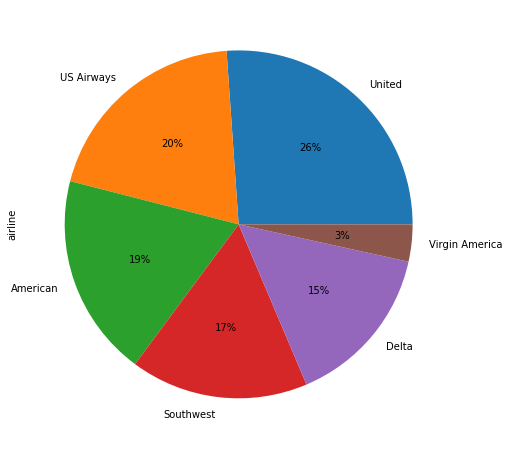

In [10]:
#Number of tweets from each airline#
plt.figure(figsize=(10,8))
df.airline.value_counts().plot(kind='pie', autopct = '%1.0f%%')


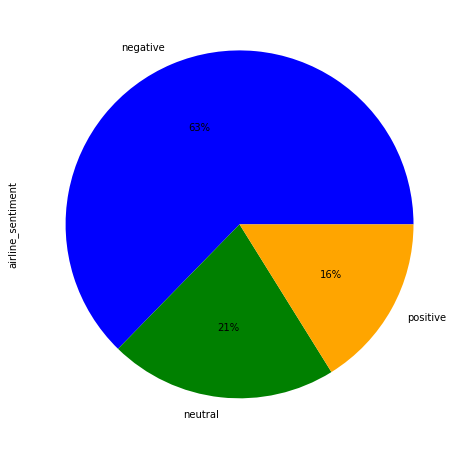

In [11]:
#Total number of positive, negative and neutral tweets#
plt.figure(figsize=(10,8))
df.airline_sentiment.value_counts().plot(kind='pie', autopct = '%1.0f%%', colors = ['blue', 'green', 'orange'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


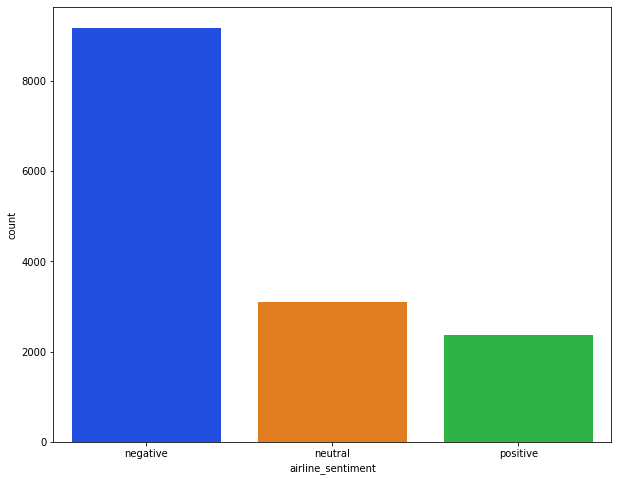

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(df['airline_sentiment'], order =df.airline_sentiment.value_counts().index,palette= 'bright')
plt.show()

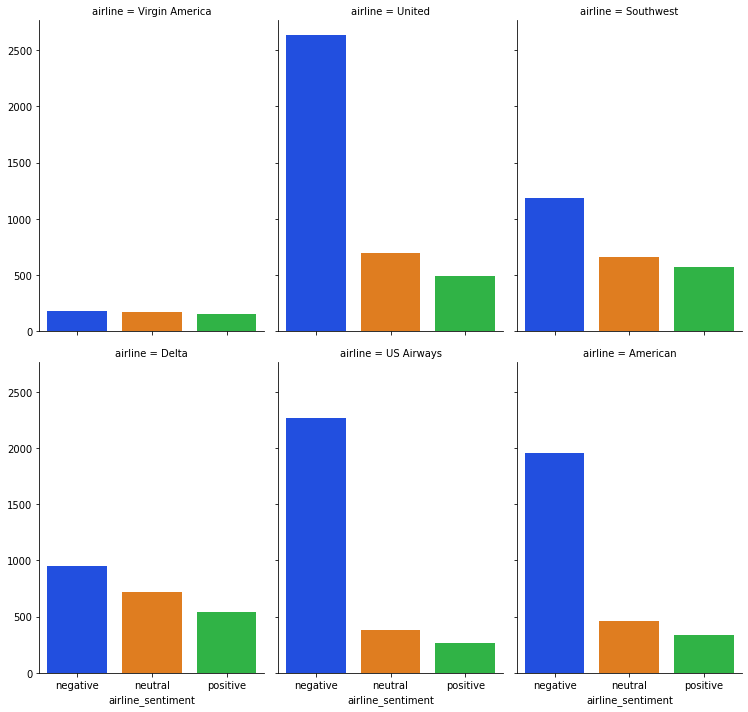

In [13]:
sentiment= sns.FacetGrid(df, col="airline", col_wrap=3, height=5, aspect =0.7)
sentiment = sentiment.map(sns.countplot,"airline_sentiment",order=df.airline_sentiment.value_counts().index, palette="bright")
plt.show()

In [14]:
df.index

RangeIndex(start=0, stop=14640, step=1)

In [15]:
features = df.iloc[:,2].values
labels = df.iloc[:, 0].values

In [16]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [17]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [18]:
import re
processed_features = []

for sentence in range(0, len(features)):
    # Removed all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # removed all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Substituted multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Converted to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [19]:
processed_features[0:10]

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ']

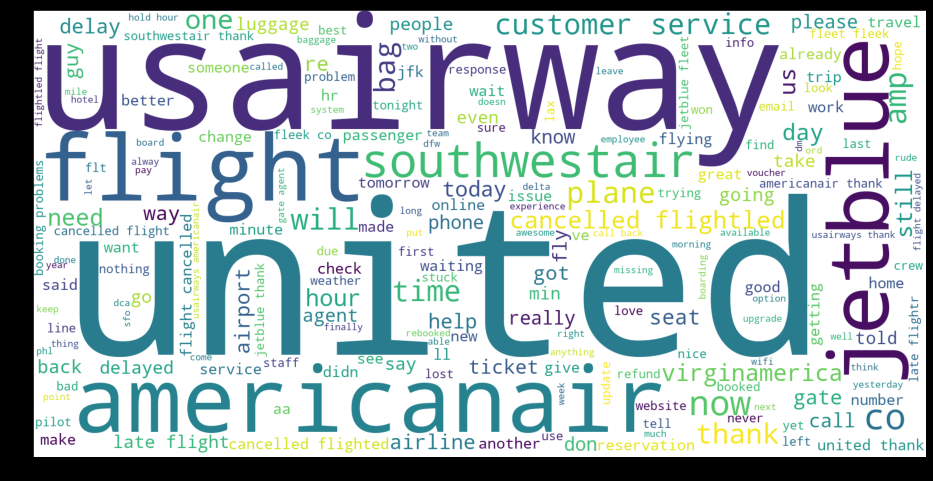

In [27]:
from wordcloud import WordCloud
unique_string=" ".join(processed_features)
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(unique_string)
plt.figure( figsize=(16,10), facecolor='k')
plt.imshow(wordcloud)

In [35]:
len(processed_features)

14640

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
processed_features_Vec = [nltk.word_tokenize(text) for text in processed_features ]

In [39]:
len(processed_features_Vec)

14640

In [42]:
from gensim.models import Word2Vec
model = Word2Vec(processed_features_Vec, min_count=10, size =32)

In [44]:
model.wv.most_similar('help')

[('me', 0.9150816202163696),
 ('please', 0.8939176797866821),
 ('give', 0.8584454655647278),
 ('follow', 0.8450518846511841),
 ('dm', 0.8377733826637268),
 ('someone', 0.8353910446166992),
 ('need', 0.8299570083618164),
 ('find', 0.8297346830368042),
 ('add', 0.8229460716247559),
 ('send', 0.8190155029296875)]

In [81]:
model.wv['happy']

array([ 7.5176156e-01, -4.0868253e-01,  2.3422504e-02, -1.8182881e-01,
        3.9463520e-01,  6.0961908e-01,  2.0827323e-01,  1.2769672e-01,
       -9.5496632e-02,  5.3921872e-01, -4.7450531e-01, -1.7530355e-01,
        1.2593256e-02, -1.5419127e-01, -2.1495110e-01,  3.0707610e-01,
        2.7848777e-01,  1.5277345e-01, -5.8158803e-01, -3.7423310e-01,
        1.6640392e-01, -6.2627530e-01, -1.7536138e-01, -4.9792662e-01,
        2.4094900e-04,  3.7323970e-01, -2.2769614e-01,  1.1516546e-01,
        2.2625107e-01, -4.3658814e-01,  6.0895044e-01, -2.9290017e-01],
      dtype=float32)

In [85]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=100, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features)

In [ ]:
processed_features

In [38]:
processed_features.getnnz()

76522

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=10, n_jobs=-1)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print('accuracy score',accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, Final_predictions, digits=3))

[[1603  107   71]
 [ 360  254   66]
 [ 135   60  272]]
accuracy score 0.7271174863387978
              precision    recall  f1-score   support

    negative      0.710     0.963     0.817      1781
     neutral      0.686     0.274     0.391       680
    positive      0.764     0.396     0.522       467

    accuracy                          0.712      2928
   macro avg      0.720     0.544     0.577      2928
weighted avg      0.713     0.712     0.671      2928



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



In [ ]:
gridsearch = GridSearchCV(estimator=text_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 56.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=False, random_state=10,
                                    

In [ ]:
gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
Final_model = RandomForestClassifier(n_estimators=100, random_state=10, bootstrap= True,
 max_depth = 110,
 max_features = 3,
 min_samples_leaf = 3,
 min_samples_split = 10,
 n_jobs=-1)

In [ ]:
Final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
Final_predictions = Final_model.predict(X_test)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics

In [ ]:
print(confusion_matrix(y_test,Final_predictions))
print('accuracy score',accuracy_score(y_test, Final_predictions))
print(metrics.classification_report(y_test, Final_predictions, digits=3))

[[1715   44   22]
 [ 459  186   35]
 [ 241   41  185]]
accuracy score 0.712431693989071
              precision    recall  f1-score   support

    negative      0.710     0.963     0.817      1781
     neutral      0.686     0.274     0.391       680
    positive      0.764     0.396     0.522       467

    accuracy                          0.712      2928
   macro avg      0.720     0.544     0.577      2928
weighted avg      0.713     0.712     0.671      2928



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print(Final_model.predict_proba(X_test))

[[0.82221984 0.07840271 0.09937745]
 [0.33935118 0.31968749 0.34096133]
 [0.78216859 0.09035978 0.12747163]
 ...
 [0.85164406 0.08519444 0.0631615 ]
 [0.87371812 0.08865678 0.03762509]
 [0.54377788 0.29238239 0.16383973]]


In [ ]:
print(roc_auc_score(y_test, Final_model.predict_proba(X_test), multi_class = 'ovr'))

0.8557938692894772
